In [44]:
from IPython.display import Markdown, display
import matplotlib.pyplot as plt
import pandas as pd
import akshare as ak
from datetime import datetime
import time
import os
import warnings
import seaborn as sns
# 忽略所有警告信息
warnings.filterwarnings('ignore')
plt.rcParams["font.serif"] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False

In [45]:
def analyzing(df, start_time:str="09:30:00", end_time:str="15:00:00" ,buy_or_sell="B"):
  df['date'] = pd.to_datetime(df['time'])
  df['dt'] = df['date'].dt.date
  df['hour'] = df['date'].dt.hour
  df['pct'] = round(100 * df['diff'] / df['price'], 2)
  
  dt = df.iloc[0]['dt']
  start_datetime = pd.to_datetime(f"{dt} {start_time}")
  end_datetime = pd.to_datetime(f"{dt} {end_time}") 
  df = df[(df['date'] >= start_datetime) & (df['date'] <= end_datetime)] 
  df_trade = df[df['signal'] == buy_or_sell]
  
  cost = 100 * df_trade['price']
  cost = int(cost.sum())
  
  profit = 100 * df_trade['diff']
  profit = round(profit.sum(), 2)
  profit_rate = round(100 * profit / cost, 2) if len(df_trade)>0 else 0
   
  df_trade_win = df_trade[df_trade["diff"] > 0] if buy_or_sell=="B" else df_trade[df_trade["diff"] <= 0]
  df_trade_win_count = len(df_trade_win)
  df_trade_fail_count = len(df_trade) - len(df_trade_win)
  
  # print(start_time,end_time, df_trade_win_count,len(df_trade))
  win_rate = round(100 * df_trade_win_count / len(df_trade), 2) if len(df_trade)>0 else 0
  fail_rate = round(100 * df_trade_fail_count / len(df_trade), 2) if len(df_trade)>0 else 0
  
  symobl_counts = df_trade['code'].nunique()
  # print("-" * 50)
  # print(f'{dt} {start_time}-{end_time}',  "买入交易分析" if buy_or_sell=="B" else "卖出交易分析" )
  # print("总成本：{} 总收益：{} 收益率：{}%".format(cost, profit, profit_rate))
  # print("交易笔数：{} 盈利笔数：{} 亏损笔数：{}".format(
  #     len(df_trade), df_trade_win_count, df_trade_fail_count))
  # print("胜率：{}% 败率：{}% ".format(win_rate, fail_rate))  
  
  return {
          '时间段': f'{dt} {start_time}-{end_time}',
          '股票个数': symobl_counts,
          '交易笔数': len(df_trade), 
          '总成本': cost, 
          '总收益': profit, 
          '做对笔数': df_trade_win_count, 
          '做错笔数': df_trade_fail_count, 
          '胜率': win_rate, 
          '败率': fail_rate, 
          '收益率':profit_rate
          }

In [46]:
data_type = {
    'time': str,
    'code': str,
    'name': str,
    'signal': str,
    'price': float,
    'final_close': float,
    'diff': float
}

print("甘州图灵交易信号分析报告")
directory = 'results/csv'
files = sorted([f for f in os.listdir(directory) if f.endswith('.csv')])
daily_results_buy= []
daily_results_sell= []
df_spot = ak.stock_zh_a_spot_em()
print(df_spot.columns)
for filename in files:
    if filename.endswith('.csv'):
        file_path = os.path.join(directory, filename)

        df = pd.read_csv(file_path, dtype=data_type)
        if not hasattr(df, 'time'):
           df.rename(columns={"date":"time"},inplace=True)
           for ind,row in df.iterrows():
               code = row["code"]
               closing_price = df_spot.query(f'`代码` == "{code}"')['最新价'].iloc[0]
               df['final_close'] = closing_price
               df['diff'] = closing_price -  row["close"]               
               df['price'] =  row["close"]               
        if not hasattr(df, 'signal'):
           df['signal'] = 'B'
        file_name_with_extension, file_extension = os.path.splitext(file_path)
        dt = os.path.basename(file_name_with_extension)
        # print(dt)        
        daily_results_buy.append(analyzing(df,start_time="09:30",end_time="09:59",buy_or_sell="B"))
        daily_results_sell.append(analyzing(df,start_time="09:30",end_time="09:59",buy_or_sell="S"))
        daily_results_buy.append(analyzing(df,start_time="10:00",end_time="10:29",buy_or_sell="B"))
        daily_results_sell.append(analyzing(df,start_time="10:00",end_time="10:29",buy_or_sell="S"))
        daily_results_buy.append(analyzing(df,start_time="10:30",end_time="10:59",buy_or_sell="B"))
        daily_results_sell.append(analyzing(df,start_time="10:30",end_time="10:59",buy_or_sell="S"))
        daily_results_buy.append(analyzing(df,start_time="11:00",end_time="11:30",buy_or_sell="B"))
        daily_results_sell.append(analyzing(df,start_time="11:00",end_time="11:30",buy_or_sell="S"))
        daily_results_buy.append(analyzing(df,start_time="13:00",end_time="13:29",buy_or_sell="B"))
        daily_results_sell.append(analyzing(df,start_time="13:00",end_time="13:29",buy_or_sell="S"))
        daily_results_buy.append(analyzing(df,start_time="13:30",end_time="13:59",buy_or_sell="B"))
        daily_results_sell.append(analyzing(df,start_time="13:30",end_time="13:59",buy_or_sell="S"))
        daily_results_buy.append(analyzing(df,start_time="14:00",end_time="14:29",buy_or_sell="B"))
        daily_results_sell.append(analyzing(df,start_time="14:00",end_time="14:29",buy_or_sell="S"))
        daily_results_buy.append(analyzing(df,start_time="14:30",end_time="15:00",buy_or_sell="B"))
        daily_results_sell.append(analyzing(df,start_time="14:30",end_time="15:00",buy_or_sell="S"))
df_trade_results = pd.DataFrame(daily_results_buy)
df_sell_results = pd.DataFrame(daily_results_sell)
# df_all_results.to_excel('all_results.xlsx', index=False)
df_trade_results.to_csv(f'results_for_buy.csv', index=False,encoding='utf_8_sig')
df_sell_results.to_csv(f'results_for_sell.csv', index=False,encoding='utf_8_sig')

甘州图灵交易信号分析报告
Index(['序号', '代码', '名称', '最新价', '涨跌幅', '涨跌额', '成交量', '成交额', '振幅', '最高', '最低',
       '今开', '昨收', '量比', '换手率', '市盈率-动态', '市净率', '总市值', '流通市值', '涨速', '5分钟涨跌',
       '60日涨跌幅', '年初至今涨跌幅'],
      dtype='object')


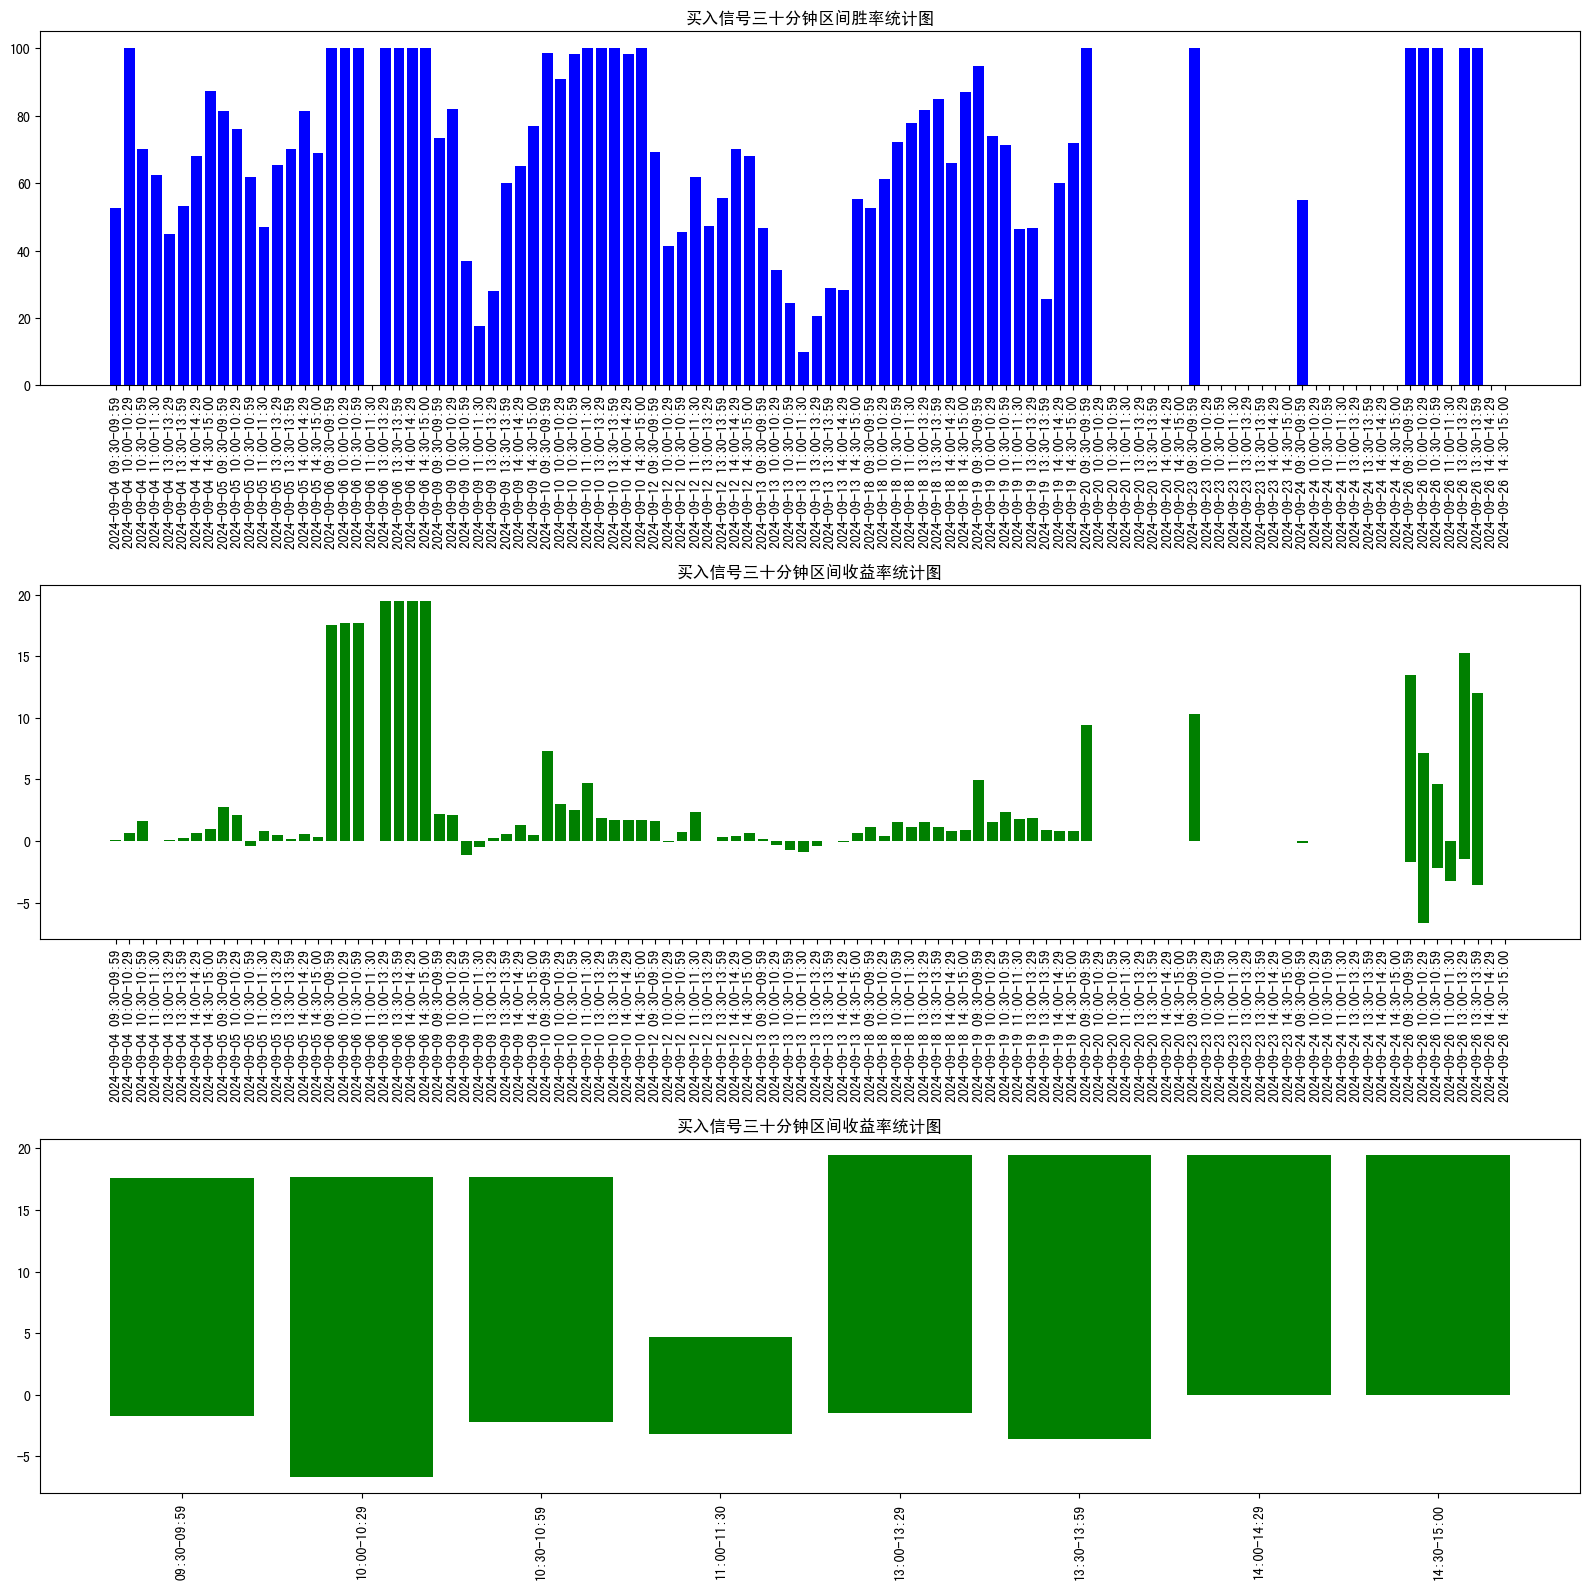

In [47]:
df_trade_results["time_segment"] = df_trade_results["时间段"].astype(str).str[11:]
# 设置图表大小
plt.figure(figsize=(16, 16))


# 绘制胜率柱状图
plt.subplot(3, 1, 1)  # 3行1列的第1个
plt.bar(df_trade_results['时间段'], df_trade_results['胜率'], color='b')
plt.title(f'买入信号三十分钟区间胜率统计图')
plt.xticks(rotation=90)  # 旋转x轴标签以便更好地显示

# 绘制收益率柱状图
plt.subplot(3, 1, 2)  # 3行1列的第3个
plt.bar(df_trade_results['时间段'], df_trade_results['收益率'], color='g')
plt.title('买入信号三十分钟区间收益率统计图')
plt.xticks(rotation=90)

# 绘制收益率柱状图
plt.subplot(3, 1, 3)  # 3行1列的第3个
plt.bar(df_trade_results['time_segment'], df_trade_results['收益率'], color='g')
plt.title('买入信号三十分钟区间收益率统计图')
plt.xticks(rotation=90)

# 调整布局
plt.tight_layout()
plt.show()

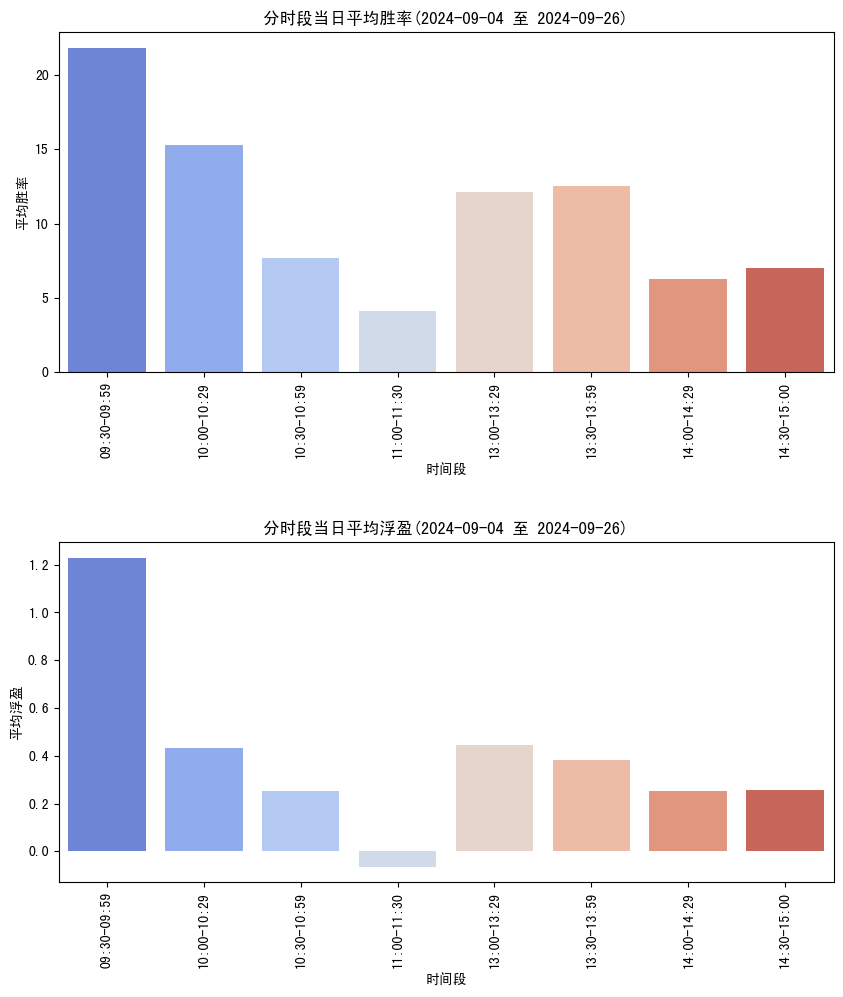

In [48]:
# 计算每个时段的平均胜率和平均收益率
avg_win_rate = df_trade_results.groupby('time_segment')['胜率'].mean()
avg_return_rate = df_trade_results.groupby('time_segment')['收益率'].mean()

start_date = df_trade_results.iloc[0]["时间段"][:10]
end_date = df_trade_results.iloc[-1]["时间段"][:10]
# 创建一个图表窗口，并设置子图的布局
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 5))

# 绘制平均胜率图
win_rate_colors = sns.color_palette("Blues", as_cmap=True)
sns.barplot(x=avg_win_rate.index, y=avg_win_rate.values, ax=ax1, palette="coolwarm")
ax1.set_title(f'分时段当日平均胜率({start_date} 至 {end_date})')
ax1.set_xlabel('时间段')
ax1.set_ylabel('平均胜率')


# 绘制平均收益率图
return_rate_colors = sns.color_palette("Greens", as_cmap=True)
sns.barplot(x=avg_return_rate.index, y=avg_return_rate.values, ax=ax2, palette="coolwarm")
ax2.set_title(f'分时段当日平均浮盈({start_date} 至 {end_date})')
ax2.set_xlabel('时间段')
ax2.set_ylabel('平均浮盈')

# 旋转 X 轴标签
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)

# 调整子图之间的垂直间隔
fig.subplots_adjust(bottom=0.1, top=1.8, hspace=0.5)
plt.show()
